In [1]:
from src.a_roberta_benchmark_save_words_new import main as benchmark_main

benchmark_main(temp=1, clean=True)

Benchmarking Ericu950/macronizer_mini on Norma Syllabarum Graecarum...


100%|██████████| 16/16 [00:03<00:00,  4.21it/s]



File                            All Acc    H Acc    L Acc
------------------------------------------------------------
acharnenses.txt                  95.65%    0.00%   95.65%
contracelsum.txt                 92.68%   62.50%  100.00%
cratylus.txt                     93.44%   60.00%  100.00%
cyclops.txt                      97.96%  100.00%   97.62%
dionysiaca.txt                   93.75%    0.00%   98.36%
dioscorides.txt                  93.94%   50.00%  100.00%
enchiridion.txt                  97.56%   83.33%  100.00%
insolem.txt                      96.97%   75.00%  100.00%
norma_aristophanis_canticorum.txt   92.50%   60.52%   97.05%
oedipus.txt                      92.68%   62.50%  100.00%
partheneion.txt                  57.69%    9.09%   93.33%
plutarchus.txt                   95.45%   81.82%   97.40%
quintus.txt                      91.18%   50.00%   96.67%
supplices.txt                    85.71%   25.00%  100.00%
thucydides.txt                   98.72%   75.00%  100.00%

Evalua

68.2% av misslyckade ord hade -, dvs hade något som gjorde att en token var out of vocab

Processing 350 words with odycy pipeline...


/Users/albin/.pyenv/versions/odycy/lib/python3.12/site-packages/thinc/shims/pytorch.py:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(self._mixed_precision):


Results saved to failed_words/failed_words_with_analysis.tsv
Added morphological analysis, lemma, and POS for 350 words
POS Tag Distribution:
------------------------------
NOUN    :  123 ( 35.1%)
VERB    :   86 ( 24.6%)
ADJ     :   67 ( 19.1%)
ADV     :   27 (  7.7%)
PART    :    7 (  2.0%)
INTJ    :    6 (  1.7%)
PROPN   :    6 (  1.7%)
PUNCT   :    6 (  1.7%)
ADP     :    5 (  1.4%)
SCONJ   :    5 (  1.4%)
PRON    :    5 (  1.4%)
NUM     :    3 (  0.9%)
AUX     :    2 (  0.6%)
X       :    2 (  0.6%)
------------------------------
Total:    350 (100.0%)

TOP 10 MOST COMMON FAILED WORDS:
 1. ἂ^ν                  -   7 occurrences
 2. ἵ^να^                -   5 occurrences
 3. χἄ_μα^               -   4 occurrences
 4. τἀ_πὶ^               -   3 occurrences
 5. Σουνι^ά^ρα_τε,       -   3 occurrences
 6. πυ^ρὸς               -   2 occurrences
 7. Δι^ονύ_σου:          -   2 occurrences
 8. Κρα^τύ_λος           -   2 occurrences
 9. πυ^ρὶ^               -   2 occurrences
10. κἀ_πι^δώσειν

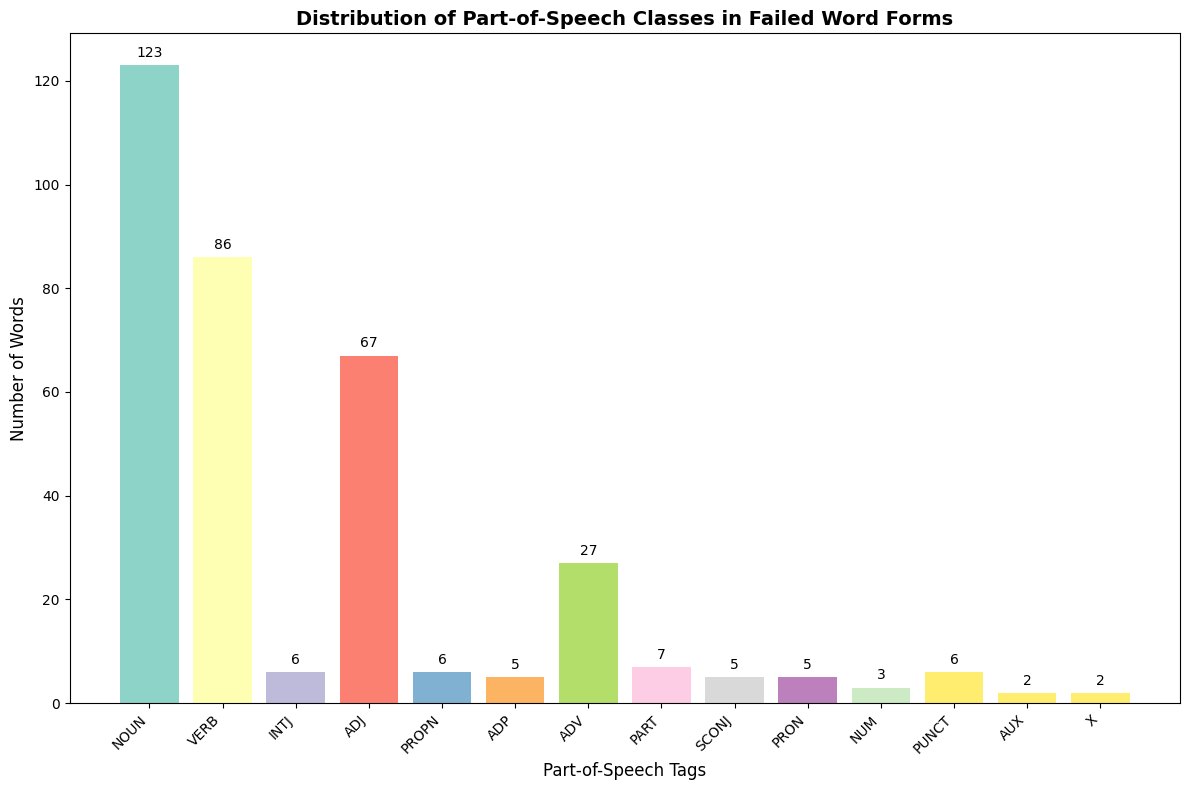

In [4]:
from src.b_analyze_failed_words import main as analyze_main
from src.c_visualize_failed_words import main as visualize_main

analyze_main()
visualize_main()

no_prediction = 0
with open("failed_words/failed_words_with_analysis.tsv", "r", encoding="utf-8") as f:
    lines = f.readlines()
    lines = set(lines)

    gold_seen = []
    for line in lines:
        tabs = line.split("\t")
        if tabs[2] not in gold_seen:
            gold_seen.append(tabs[2])
            prediction = tabs[4]
            for char in prediction:
                if char == "-":
                    no_prediction += 1

print(f"Number of words with skipped sylls (mcl): {no_prediction} out of {len(lines)}")
print(f"Percentage of words with skipped sylls (mcl): {no_prediction / len(lines) * 100:.2f}%")